In [1]:
from random_forest import RandomForest
from cleaning import data_new, X_train, X_test, y_train, y_test, np, pd
from sklearn.model_selection import train_test_split
import numpy as np

clf = RandomForest()
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)

In [2]:
from nb import NaiveBayesClassifier

nb_classifier = NaiveBayesClassifier()
print('Naive Bayes Model :')
# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

Naive Bayes Model :


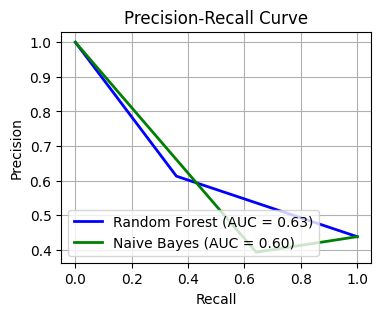

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
auc_rf = auc(recall_rf, precision_rf)

# Calculate precision-recall curve for Naive Bayes
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_pred_nb)
auc_nb = auc(recall_nb, precision_nb)

# Plot precision-recall curve
plt.figure(figsize=(4, 3))
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(recall_nb, precision_nb, color='green', lw=2, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


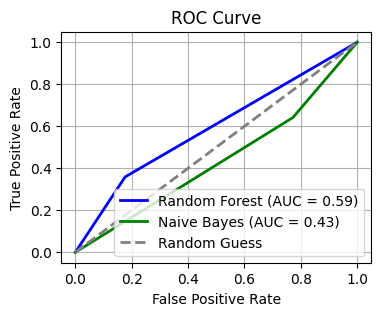

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Assuming y_test contains the true labels and y_pred_rf, y_pred_nb contain the predicted probabilities or scores for Random Forest and Naive Bayes respectively
# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [5]:
#donno
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test contains the true labels and y_pred_rf, y_pred_nb contain the predicted labels for Random Forest and Naive Bayes respectively

# Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Print confusion matrices
print("Confusion Matrix for Random Forest:")
print(cm_rf)
print("\nConfusion Matrix for Naive Bayes:")
print(cm_nb)

# # Print classification report for Random Forest
# print("\nClassification Report for Random Forest:")
# print(classification_report(y_test, y_pred_rf))

# # Print classification report for Naive Bayes
# print("\nClassification Report for Naive Bayes:")
# print(classification_report(y_test, y_pred_nb))


Confusion Matrix for Random Forest:
[[112  24]
 [ 68  38]]

Confusion Matrix for Naive Bayes:
[[ 31 105]
 [ 38  68]]


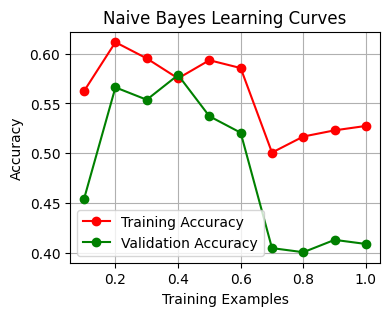

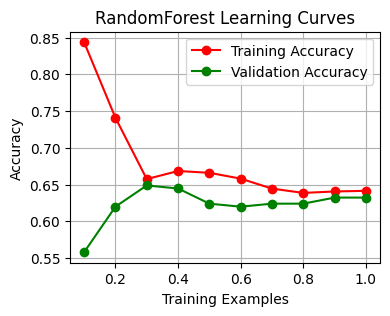

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score  # Import accuracy_score function

def calculate_learning_curves(model, X_train, y_train, X_val, y_val):
    train_scores = []
    val_scores = []
    train_sizes = np.linspace(0.1, 1.0, 10)

    for train_size in train_sizes:
        # Define the size of the training set
        size = int(train_size * len(X_train))
        
        # Select a subset of the training data
        X_train_subset = X_train[:size]
        y_train_subset = y_train[:size]
        
        # Train the model on the subset of the training data
        model.fit(X_train_subset, y_train_subset)
        
        # Calculate training and validation accuracy
        train_score = accuracy_score(y_train_subset, model.predict(X_train_subset))
        val_score = accuracy_score(y_val, model.predict(X_val))
        
        # Append scores to lists
        train_scores.append(train_score)
        val_scores.append(val_score)

    return train_sizes, train_scores, val_scores

# Assuming you have X_train, y_train, X_val, y_val
# Initialize RandomForest model
rf_model = RandomForest(n_trees=10, min_samples_split=15, max_depth=3)
nb_model = NaiveBayesClassifier()

# Calculate learning curves for RandomForest
train_sizes_rf, train_scores_rf, val_scores_rf = calculate_learning_curves(rf_model, X_train, y_train, X_test, y_test)
train_sizes_nb, train_scores_nb, val_scores_nb = calculate_learning_curves(nb_model, X_train, y_train, X_test, y_test)

# Plot learning curves
plt.figure(figsize=(4, 3))
plt.plot(train_sizes_nb, train_scores_nb, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes_nb, val_scores_nb, 'o-', color="g", label="Validation Accuracy")
plt.title("Naive Bayes Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(train_sizes_rf, train_scores_rf, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes_rf, val_scores_rf, 'o-', color="g", label="Validation Accuracy")
plt.title("RandomForest Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()